## Project - California Housing Price Prediction : Ransom Kumar

In [1]:
# import numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the housing data into a DataFrame

In [2]:
# read in the data set file to a housing dataframe

housing_df = pd.read_excel("housing.xlsx")

In [3]:
housing_df.shape

(20640, 10)

In [4]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

### View the first few rows of the Dataframe

In [5]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [6]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [7]:
len(housing_df[housing_df.total_bedrooms.isna()])

207

Based on the Output of info -  total_bedrooms has null values which we must handle. There are 207 rows with null values in total bedrooms. This is a small portion of the total samples


### Handle missing values : Fill the missing values with the mean of the respective column

In [8]:
print("Mean of total bedrooms: ",np.mean(housing_df.total_bedrooms))

Mean of total bedrooms:  537.8705525375618


In [9]:
housing_df["total_bedrooms"]=housing_df["total_bedrooms"].fillna(np.mean(housing_df.total_bedrooms))

In [10]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [11]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


All the NA values in the total_bedrooms has been replaced with mean value = 537.8705525375618 
 
Now we create the input X features and the output Y (Target) which is median_house_value.

Here since the longitude and latitude only define the block these columns are excluded from the features. As the objective is to create a linear regression model to predict housing prices or values in any district the location which is indicated by the block (in this data set the longitude and latitude variables) would not be relevant in the model building.<p>

### Extract input (X) and output (Y) data from the dataset

In [12]:
x_features = housing_df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income',
              'ocean_proximity']]
y_target = housing_df['median_house_value']

### Encode categorical data : Convert categorical column in the dataset to numerical data.

In [13]:
x_features['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

Now encoding the categorical variable i.e (Ocean proximity) which has values like : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'

In [14]:
# Using the get_dummies function in Pandas dataframe to create a dummy encoding for the categorical variable
# Since the o/p is a data frame combining the encoded data frame with new dummy variables to the original x_features using join
x_features = x_features.join(pd.get_dummies(x_features["ocean_proximity"], prefix="ocean_prox_"))

In [15]:
# dropping the ocean_proximity column since the encoded information from the same column is now in the new columns.
x_features = x_features.drop("ocean_proximity", axis = 1)

In [16]:
x_features.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_prox__<1H OCEAN,ocean_prox__INLAND,ocean_prox__ISLAND,ocean_prox__NEAR BAY,ocean_prox__NEAR OCEAN
0,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,52,1627,280.0,565,259,3.8462,0,0,0,1,0


### Before we go ahead with the Linear regression model building. Performing some basic Exploratory Data Analysis<h3>

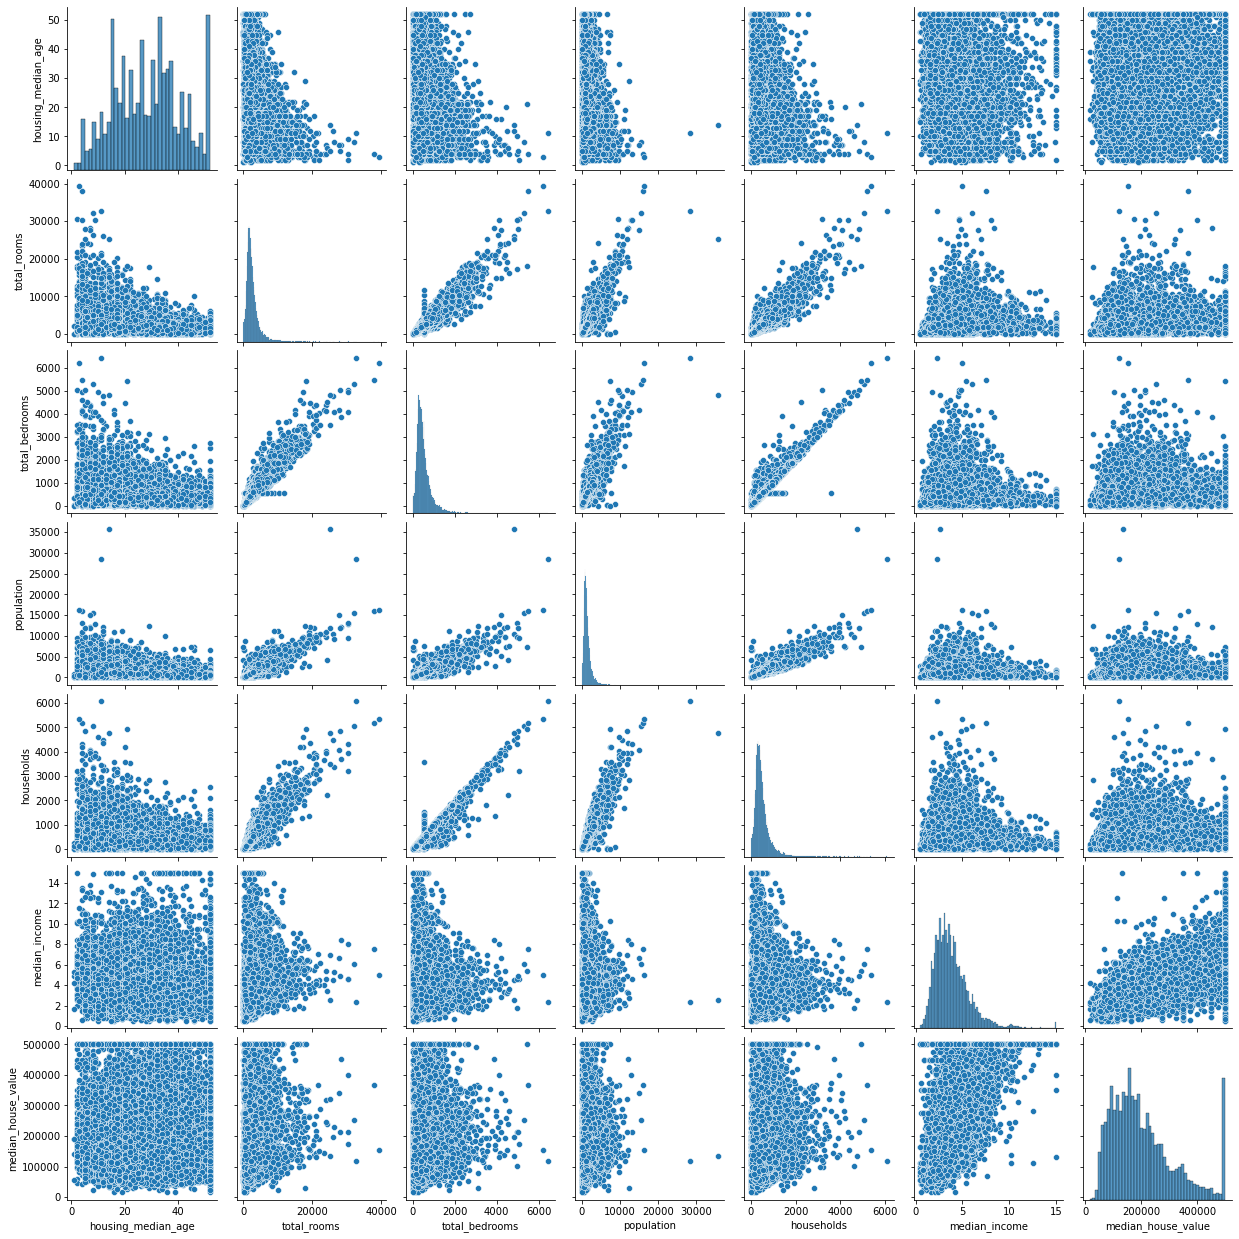

In [17]:
sns.pairplot(housing_df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income',
              'median_house_value']])
plt.show()

There are no strong trends between median_house_value and any other feature variables other than median_income

Also a linear relation is seen only between 'households' and 'total_rooms' and 'total_bedrooms' which follows logically. Checking correlation to review the same

In [18]:
corr_df = housing_df[['housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income',
              'median_house_value']].corr()
corr_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
housing_median_age,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153
total_bedrooms,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454
population,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650
households,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843
median_income,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075
median_house_value,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000


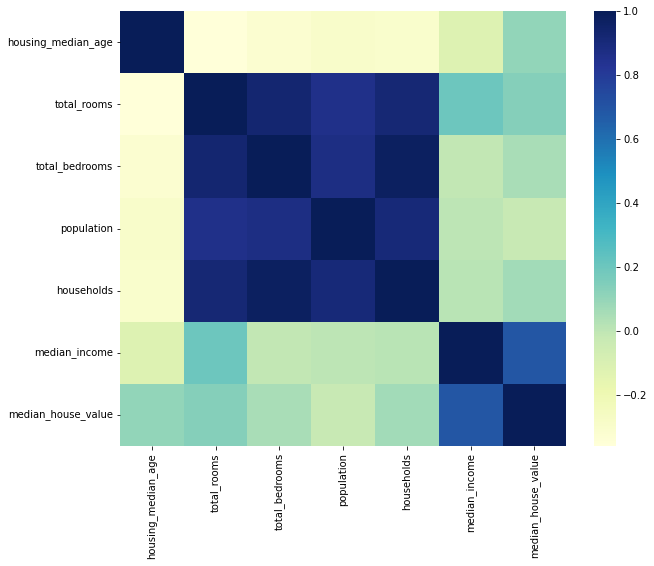

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df,cmap="YlGnBu")
plt.show()

Based on the correlation matrix and plot we can see that median_house_value is more closely correlated to median_income in general. So this would be ideal feature to utilize in our regression model
As reviewed earlier from scatter plots - correlation is high between 'population', 'households' and 'total_rooms' and 'total_bedrooms' .

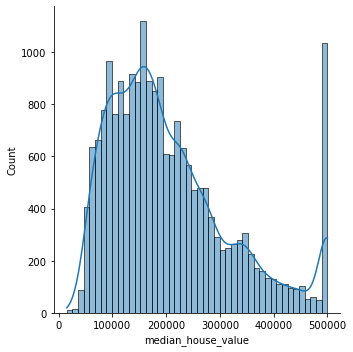

In [20]:
sns.displot(housing_df["median_house_value"],kde=True)

Note there is a significant number of districts in the data set where the Median house price is equal to the max of 500000 as seen by the Distribution plot. This would skew the average house prices.

### Building the regression model

#### Next splitting the data set into train and test using sci-kit learn. We split the data 80/20 for train and test dataset

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x_features,y_target,test_size=0.2,random_state=47)

In [23]:
#Print the shape of the Original and Test train data splits
print(x_features.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(20640, 11)
(16512, 11)
(4128, 11)
(16512,)
(4128,)


#### Build initial regression model. This is without the standardization to see the coefficients for the features to predict median house prices 

In [24]:
#import linear regression class and create the estimator object lm
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [25]:
lm.fit(x_train,y_train)

LinearRegression()

In [26]:
lm.intercept_

55466.507186305535

In [27]:
coeff_df = pd.DataFrame(lm.coef_,index=x_train.columns,columns=["Coefficients"])

In [28]:
coeff_df

,Coefficients
housing_median_age,1151.273053
total_rooms,-5.624707
total_bedrooms,55.367018
population,-43.086798
households,111.335367
median_income,39670.770673
ocean_prox__<1H OCEAN,-24620.746417
ocean_prox__INLAND,-93312.450864
ocean_prox__ISLAND,150853.247274
ocean_prox__NEAR BAY,-21500.799758


These are the model coefficients taking all the feature variables into consideration

In [29]:
lm.score(x_test,y_test)

0.6313183152458162

Model has a R-squared score of 63%. which indicates 63% variation is explained by the model. This is an initial model and may have insignificant variables as well. 

Next we can check the MSE of the model as well

In [30]:
predicted_housing_value = lm.predict(x_test)

#### Check the MSE for the model

In [31]:
from sklearn import metrics

In [32]:
mse = metrics.mean_squared_error(y_test,predicted_housing_value)
rmse = np.sqrt(mse)
print( "The mean squared error of the model is " , mse)
print( "The Root- mean squared error of the model is " , rmse)

The mean squared error of the model is  5024648842.5575075
The Root- mean squared error of the model is  70884.75747688996


### Standardize the dataset

Using the standard scaler to perform the activity.

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
scaler.fit(x_train)

StandardScaler()

In [35]:
# Scaling both train and test data using the fit done on the train data 
# to ensure test data has the same scaling applied as the training data

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

The output of scaler.transform is an Nd-array so converting back to a dataframe.

In [36]:
x_train_std_df = pd.DataFrame(x_train_std, columns=x_features.columns)
x_train_std_df

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_prox__<1H OCEAN,ocean_prox__INLAND,ocean_prox__ISLAND,ocean_prox__NEAR BAY,ocean_prox__NEAR OCEAN
0,-1.562172,-0.768710,-0.891436,-0.749814,-0.909508,-0.364751,1.122938,-0.682385,-0.017404,-0.354564,-0.383179
1,-1.005349,-0.024404,0.570788,-0.265597,0.594078,-0.258200,-0.890522,-0.682385,-0.017404,-0.354564,2.609748
2,0.267389,-0.636950,-0.869575,-0.829760,-0.845639,-0.109336,-0.890522,1.465449,-0.017404,-0.354564,-0.383179
3,0.585573,-0.568733,-0.643684,-0.380973,-0.576856,-0.077904,-0.890522,-0.682385,-0.017404,2.820363,-0.383179
4,-1.005349,0.156884,0.879263,0.121414,0.791008,-0.683188,1.122938,-0.682385,-0.017404,-0.354564,-0.383179
...,...,...,...,...,...,...,...,...,...,...,...
16507,-0.209888,0.456849,0.480917,1.075313,0.548837,-0.410340,1.122938,-0.682385,-0.017404,-0.354564,-0.383179
16508,-0.209888,-0.286523,0.036420,-0.688038,0.032562,-0.846738,1.122938,-0.682385,-0.017404,-0.354564,-0.383179
16509,0.028751,0.110627,-0.004872,-0.026668,0.064497,-0.000936,-0.890522,-0.682385,-0.017404,-0.354564,2.609748
16510,0.506027,-0.084677,-0.007301,-0.212905,0.056513,0.743069,-0.890522,-0.682385,-0.017404,2.820363,-0.383179


In [37]:
print(x_train_std.shape)
print(x_test_std.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 11)
(4128, 11)
(16512,)
(4128,)


### Building the linear model with the standardized Dataset

<h4>Perform Linear Regression on training data

In [38]:
lm_standardized = LinearRegression()
lm_standardized.fit(x_train_std,y_train)

LinearRegression()

In [39]:
print ("Intercept of the model is: ", lm_standardized.intercept_)

Intercept of the model is:  206838.33987403102


In [40]:
standardized_coeff_df = pd.DataFrame(lm_standardized.coef_,index = x_features.columns,columns=["Coefficients"])

In [41]:
standardized_coeff_df

,Coefficients
housing_median_age,14473.027716
total_rooms,-12038.267872
total_bedrooms,22794.700957
population,-47427.600470
households,41836.311638
median_income,75096.659416
ocean_prox__<1H OCEAN,9610.838882
ocean_prox__INLAND,-22972.296703
ocean_prox__ISLAND,3389.722421
ocean_prox__NEAR BAY,7077.635308


<h4>Predict output for test dataset using the fitted model.

In [42]:
standardized_predicted_house_prices = lm_standardized.predict(x_test_std)
standardized_predicted_house_prices

array([256365.53102878, 116345.43778712, 403126.19039426, ...,
       367546.5324241 , 170501.61407087, 220520.24859472])

In [43]:
lm_standardized.score(x_test_std,y_test)

0.6313183152458165

<h4>Print root mean squared error (RMSE) from Linear Regression

In [44]:
mse = metrics.mean_squared_error(y_test,standardized_predicted_house_prices)
rmse = np.sqrt(mse)
print( "The mean squared error of the model is " , mse)
print( "The Root- mean squared error of the model is " , rmse)

The mean squared error of the model is  5024648842.557502
The Root- mean squared error of the model is  70884.75747688992


### Bonus exercise: Perform Linear Regression with one independent variable

Extract just the median_income column from the independent variables (from X_train and X_test). Using the non-standardized dataset to create a predictive model that has same units/scaling as the original variables

In [45]:
x_train_median_income = x_train["median_income"]
x_test_median_income = x_test["median_income"]

#### Reshape the 1D array x_train_median_income to a 2D array as required by the LinearRegression estimator

In [46]:
x_train_median_income = x_train_median_income.values.reshape(-1,1)
x_test_median_income = x_test_median_income.values.reshape(-1,1)

In [47]:
print(x_train_median_income.shape)
print(x_test_median_income.shape)

(16512, 1)
(4128, 1)


#### Perform Linear Regression to predict housing values based on median_income.

In [48]:
lm_median_income = LinearRegression()
lm_median_income.fit(x_train_median_income,y_train)

LinearRegression()

In [49]:
print ("Intercept of the model is: ", lm_median_income.intercept_)
print ("Coefficient for median income is :" ,lm_median_income.coef_)
print ("The linear regression model is median_house_value = ", lm_median_income.intercept_," + " ,lm_median_income.coef_," * median_income")

Intercept of the model is:  45621.52033900996
Coefficient for median income is : [41618.60054179]
The linear regression model is median_house_value =  45621.52033900996  +  [41618.60054179]  * median_income


#### Predict output for test dataset using the fitted model

In [50]:
predicted_house_price_median_income = lm_median_income.predict(x_test_median_income)
predicted_house_price_median_income

array([255907.82329649, 149668.02169348, 373180.71590314, ...,
       381046.63140554, 155078.43976391, 233092.50647949])

In [51]:
y_test

10486    231400
16251     63600
8883     500001
15209    238700
11965    162800
          ...  
3148      79000
4588     275000
18378    485000
6927     143800
17733    164500
Name: median_house_value, Length: 4128, dtype: int64

#### Checking the R-squared score and MSE for the model

In [52]:
lm_median_income.score(x_test_median_income,y_test)

0.4910733255276222

Model has R-squared value 0.4910733255276222. So 49% variation in median house prices/value is explained by the median incomes in the district

In [53]:
mse = metrics.mean_squared_error(y_test,predicted_house_price_median_income)
rmse = np.sqrt(mse)
print( "The mean squared error of the model is " , mse)
print( "The Root- mean squared error of the model is " , rmse)

The mean squared error of the model is  6936004503.55774
The Root- mean squared error of the model is  83282.67829241409


### Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.


#### Plot for the Training data

For plotting converting the train , test - Feature data back to 1D array. These were converted to 2D-array for Linear Regression model. However the plot functions require 1D array for X-axis i.e. feature values

In [54]:
x_train_actual = x_train["median_income"]
x_test_actual = x_test["median_income"]

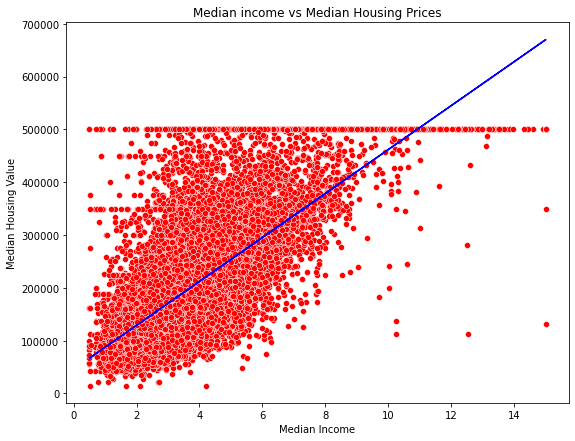

In [55]:
plt.figure(figsize=(9,7))

# The actual training data values in scatter plot in red color
sns.scatterplot(x = x_train_actual, y = y_train, color = "red")

# Plot the line of regression for the training values using the y as predict output of the model
plt.plot(x_train_actual,lm_median_income.predict(x_train_median_income), color = "blue")

plt.title("Median income vs Median Housing Prices")
plt.xlabel("Median Income")
plt.ylabel("Median Housing Value")
plt.show()

#### Plot for the Testing data

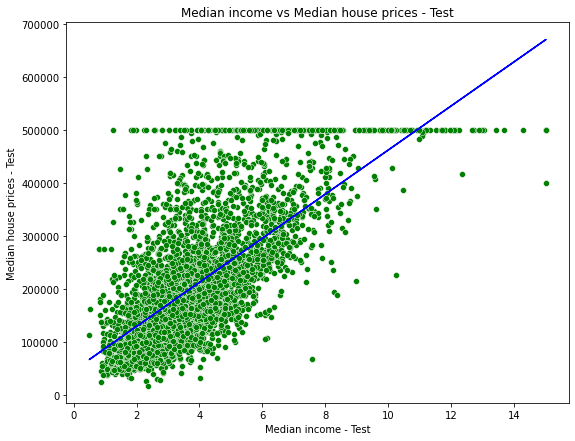

In [56]:
plt.figure(figsize=(9,7))

# The actual testing data values in scatter plot in red color
sns.scatterplot(x = x_test_actual,y= y_test, color ="green")

# Plot the line of regression for the testing values using the y as predict output - predicted_house_price_median_income
plt.plot(x_test_actual,predicted_house_price_median_income,color="blue")

plt.title("Median income vs Median house prices - Test")
plt.xlabel("Median income - Test")
plt.ylabel("Median house prices - Test")
plt.show()